# 영화리뷰 텍스트 감성분석하기

### 학습목표
---
- 텍스트 데이터를 머신러닝 입출력용 수치데이터로 변환하는 과정을 이해한다.
- RNN의 특징을 이해하고 시퀀셜한 데이터를 다루는 방법을 이해한다.
- 1-D CNN으로도 텍스트를 처리할 수 있음을 이해한다.
- IMDB와 네이버 영화리뷰 데이터셋을 이용한 영화리뷰 감성 분류 실습을 진행한다.

## 1. 텍스트 감정분석의 유용성


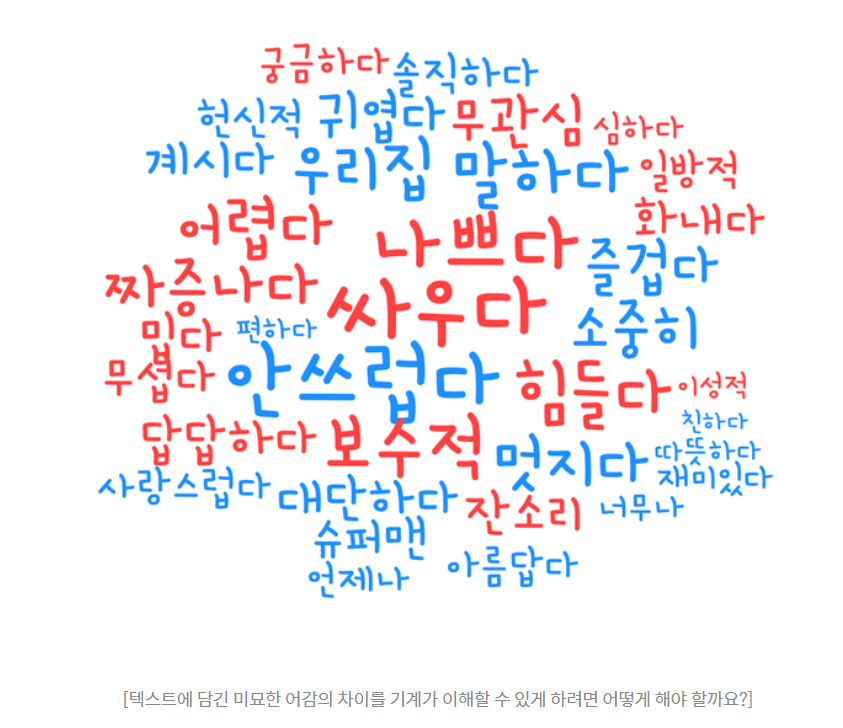

#### Q1. 텍스트 데이터에서만 얻을 수 있는 유용한 정보는 무엇인가요? 그 유용성은 텍스트 데이터의 어떤 특징으로부터 비롯되는 것인가요?
- SNS 등에서 광범위한 분량의 텍스트 데이터를 쉽게 얻을 수 있는데, 이 데이터는 소비자들의 개인적, 감성적 반응이 직접 담겨 있을뿐더러 실시간 트렌드를 빠르게 반영하는 데이터

#### Q2. 텍스트 감성분석 접근법을 크게 2가지로 나누면 무엇과 무엇이 있나요?
- 기계학습 기반 접근법과 감성사전 기반 접근법

#### Q3. 사전 기반의 감성분석이 기계학습 기반 접근법 대비 가지는 한계점을 2가지만 들어 주세요.
- 1.분석 대상에 따라 단어의 감성 점수가 달라질 수 있다는 가능성에 대응하기 어렵다.
- 2.단순 긍부정을 넘어서 긍부정의 원인이 되는 대상 속성 기반의 감성 분석이 어렵다.

#### Q4. 감성분석 등 텍스트 분류 모델이 다른 데이터분석 업무에 어떤 도움을 줄 수 있나요?
- 일반적인 데이터분석 업무는 범주화가 잘 된 정형데이터를 필요로 하는데, 이런 데이터를 큰 규모로 구축하기 위해서 많은 비용이 들지만,   
  쉽게 구할 수 있는 비정형데이터인 텍스트에 감성분석 기법을 적용하면 텍스트를 정형데이터로 가공하여   
  유용한 의사결정 보조자료로 활용할 수 있게 된다.
  
#### Q5. 라벨링 비용이 많이 드는 머신러닝 기반 감성분석의 비용을 절감하면서 정확도를 크게 향상시킬 수 있는 자연어처리 기법에는 무엇이 있나요?
- 단어의 특성을 저차원 벡터값으로 표현할 수 있는 **워드 임베딩(word embedding) 기법**

## 텍스트 데이터의 특징

### 텍스트 문장을 입력으로 받아서 그 의미가 긍정이면 1, 부정이면 0을 출력하는 인공지능 모델을 만든다고 가정
---
- 텍스트를 어떻게 숫자 행렬로 표현할 수 있나요?
- 텍스트에는 순서가 중요한데, 입력 데이터의 순서를 인공지능 모델에 어떻게 반영해야 하나요?

<br><br>
### 1. 텍스트를 숫자로 표현하는 방법
#### 사전에는 단어와 그 의미 설명이 짝지어져 있듯이 단어와 그 단어의 의미를 나타내는 벡터를 짝지어 보려고 하는 것
-  딥러닝을 통해 벡터를 만들기

### 3개의 짧은 문장으로 이루어진 텍스트 데이터를 처리하는 간단한 예제

> i feel hungry  
> i eat lunch  
> now i feel happy  

#### 1. 단어 분리
#### 2. 키값이 인덱스인 딕셔너리 만들기 -> {인덱스:텍스트}(index_to_word)
#### 3.  인텍스, 텍스트 위치 바꾸기 -> {텍스트:인덱스}(word_to_index)

In [1]:
# 처리해야 할 문장을 파이썬 리스트에 옮겨 담기
sentences=['i feel hungry', 'i eat lunch', 'now i feel happy']

# 파이썬 split() 메소드를 이용해 단어 단위로 문장을 쪼개기
word_list = 'i feel hungry'.split()
print(word_list)

['i', 'feel', 'hungry']


### 10개짜리 단어사전 만들기

In [2]:
# 모든 문장을 단어 단위로 쪼갠 후에 파이썬 딕셔너리(dict) 자료구조로 표현
index_to_word={}  # 빈 딕셔너리를 만들어서

# 단어들을 하나씩 채워 봅니다. 채우는 순서는 일단 임의로 하였습니다. 그러나 사실 순서는 중요하지 않습니다. 
# <BOS>, <PAD>, <UNK>는 관례적으로 딕셔너리 맨 앞에 넣어줍니다. 
index_to_word[0]='<PAD>'  # 패딩용 단어
index_to_word[1]='<BOS>'  # 문장의 시작지점
index_to_word[2]='<UNK>'  # 사전에 없는(Unknown) 단어
index_to_word[3]='i'
index_to_word[4]='feel'
index_to_word[5]='hungry'
index_to_word[6]='eat'
index_to_word[7]='lunch'
index_to_word[8]='now'
index_to_word[9]='happy'

print(index_to_word)

{0: '<PAD>', 1: '<BOS>', 2: '<UNK>', 3: 'i', 4: 'feel', 5: 'hungry', 6: 'eat', 7: 'lunch', 8: 'now', 9: 'happy'}


In [3]:
# 텍스트 데이터(텍스트)를 숫자로 바꾸려면 위의 딕셔너리가 {텍스트:인덱스} 구조
word_to_index={word:index for index, word in index_to_word.items()}
print(word_to_index)

{'<PAD>': 0, '<BOS>': 1, '<UNK>': 2, 'i': 3, 'feel': 4, 'hungry': 5, 'eat': 6, 'lunch': 7, 'now': 8, 'happy': 9}


In [4]:
# 단어 'feel'은 숫자 인덱스 4로 바뀝니다.
print(word_to_index['feel'])

4


### (입력:문장 1개, 딕셔너리), (출력: 단어 인덱스 리스트)로 변환해 주는 함수
- **모든 문장은 \<BOS>로 시작**

In [5]:
# 문장 1개, 딕셔너리와 함께 주면, 단어 인덱스 리스트로 변환해 주는 함수 만들기
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

print(get_encoded_sentence('i eat lunch', word_to_index))

[1, 3, 6, 7]


### 입력 : 리스트, 딕셔너리  출력: 모든 문장을 숫자로 변환
####   get_encoded_sentences안에  get_encoded_sentences함수가 있다.

In [6]:
# 여러 개의 문장 리스트를 한꺼번에 숫자 텐서로 encode해 주는 함수
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# sentences=['i feel hungry', 'i eat lunch', 'now i feel happy'] 가 아래와 같이 변환됩니다. 
encoded_sentences = get_encoded_sentences(sentences, word_to_index)
print(encoded_sentences)

[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]]


### encode된 벡터를 decode하여 다시 원래 텍스트 데이터로 복구하는 함수

In [7]:
# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수
def get_decoded_sentence(encoded_sentence, index_to_word):                               #[1:]를 통해 <BOS>를 제외
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:]) 

print(get_decoded_sentence([1, 3, 4, 5], index_to_word))

i feel hungry


### 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수
#### get_decoded_sentences안에 get_decoded_sentences있다.


In [8]:
# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

# encoded_sentences=[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]] 가 아래와 같이 변환됩니다.
print(get_decoded_sentences(encoded_sentences, index_to_word))

['i feel hungry', 'i eat lunch', 'now i feel happy']


## 2. Embedding 레이어의 등장

#### 단어와 그 단어의 의미를 나타내는 벡터를 짝짓는 것
#### 단어의 의미를 나타내는 벡터를 훈련 가능한 파라미터로 놓고 이를 딥러닝을 통해 학습해서 최적화
####  Tensorflow, Pytorch 등의 딥러닝 프레임워크 ->  의미 벡터 파라미터를 구현한 Embedding 레이어를 제공
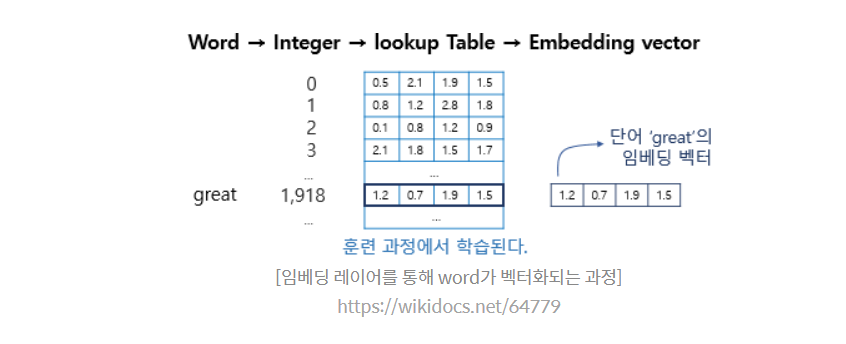
#### 그림에서 word_to_index('great')는
- **인덱스 번호 1918** 
- **워드 벡터(word vector)는 Lookup Table 형태로 구성된 Embedding 레이어의 1919번째 벡터**
- **great의 워드 벡터의 값 : 1.2, 0.7, 1.9, 1.5**

### Embedding 레이어를 활용하여 이전 스텝의 텍스트 데이터를 워드 벡터 텐서 형태로 다시 표현
- **Embedding 레이어의 인풋이 되는 문장 벡터는 그 길이가 일정**
   - **raw_inputs의 3개 벡터의 길이는 각각 4, 4, 5라서 패딩(<PAD>)을 추가하여 길이를 일정하게 맞추기**
       - tf.keras.preprocessing.sequence.pad_sequences()를 이용하여 padding

In [16]:
import numpy as np
import tensorflow as tf
import os

vocab_size = len(word_to_index)  # 예시에서 딕셔너리에 포함된 단어 개수는 10
word_vector_dim = 4    # 그림과 같이 4차원의 워드 벡터를 가정

embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)

# embedding 레이어의 input을 padding을 통해 모두 일정 길이로 맞추기
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype=object)
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=5)
output = embedding(raw_inputs)
print(output)

tf.Tensor(
[[[-0.03350706  0.01518078  0.04877407 -0.0460472 ]
  [-0.03225372  0.01776977 -0.03989116  0.01124432]
  [ 0.00835986 -0.00532883  0.00716922  0.03786108]
  [ 0.00506739 -0.04021518 -0.00720433  0.04804948]
  [-0.03322266 -0.00485038  0.00302519 -0.00183443]]

 [[-0.03350706  0.01518078  0.04877407 -0.0460472 ]
  [-0.03225372  0.01776977 -0.03989116  0.01124432]
  [ 0.00219481 -0.03470923 -0.01561397 -0.03901307]
  [ 0.0216108  -0.01486224  0.0189642   0.04964862]
  [-0.03322266 -0.00485038  0.00302519 -0.00183443]]

 [[-0.03350706  0.01518078  0.04877407 -0.0460472 ]
  [-0.01910861 -0.04490548 -0.00580417  0.01138292]
  [-0.03225372  0.01776977 -0.03989116  0.01124432]
  [ 0.00835986 -0.00532883  0.00716922  0.03786108]
  [-0.02414304 -0.02430593 -0.02347491 -0.04607457]]], shape=(3, 5, 4), dtype=float32)


#### Q6. output의 shape=(3, 5, 4)에서 3, 5, 4의 의미는 각각 무엇일까요?
- **3은 입력문장 개수, 5는 입력문장의 최대 길이, 4는 워드 벡터의 차원 수**

## 3. 시퀀스 데이터를 다루는 RNN
<br>

### Recurrent Neural Network(RNN) : 
- **시퀀스(Sequence) 형태의 텍스트 데이터를 처리하기에 최적인 딥러닝 모델**

####  시퀀스 데이터 : 바로 입력이 시간 축을 따라 발생하는 데이터

### 'i feel hungry'라는 문장을 누군가가 초당 한 단어씩, 3초에 걸쳐 이 문장을 발음 가정
> at time=0s : 듣는이의 귀에 들어온 input='i'  
> at time=1s : 듣는이의 귀에 들어온 input='feel'  
> at time=2s : 듣는이의 귀에 들어온 input='hungry'

- time=1s인 시점에서 입력으로 받은 문장은 'i feel' 까지
- 다음에 'hungry'가 올지, 'happy'가 올지 알 수 없는 상황

#### RNN은 시간의 흐름에 따라 새롭게 들어오는 입력에 따라 변하는 현재 상태를 묘사하는 state machine으로 설계
<br>

### State가 무엇인가
---
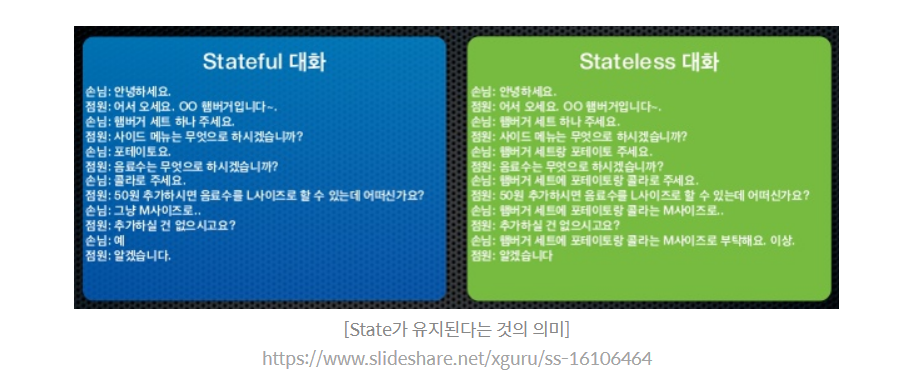

### RNN 모델을 사용하여 이전 스텝의 텍스트 데이터를 처리하는 예제 코드를 구현

In [17]:
# RNN 모델을 사용하여 이전 스텝의 텍스트 데이터를 처리하는 예제 코드를 구현
import tensorflow as tf
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4  # 단어 하나를 표현하는 임베딩 벡터의 차원수

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용, LSTM state 벡터의 차원수는 8로 정함
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 416       
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 537
Trainable params: 537
Non-trainable params: 0
_________________________________________________________________


## 4. 꼭 RNN이어야 할까? -  매우 다양한 시도 가능
<br>

### 1-D Convolution Neural Network(1-D CNN)를 사용

####  문장 전체를 한꺼번에 한 방향으로 길이 7짜리 필터로 스캐닝 하면서 7단어 이내에서 발견되는 특징을 추출한 문장을 분류하는 방식으로 사용
- **RNN 계열보다 병렬처리가 효율적이기 때문에 학습 속도도 훨씬 빠르게 진행된다는 장점 보유**

In [18]:
# CNN모델
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4   # 단어 하나를 표현하는 임베딩 벡터의 차원 수 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          464       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

### lobalMaxPooling1D() 레이어 하나만 사용하는 방법 가능

- **전체 문장 중에서 단 하나의 가장 중요한 단어만 피처로 추출한 문장의 긍정/부정을 평가하는 방식**

In [ ]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4   # 단어 하나를 표현하는 임베딩 벡터의 차원 수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

## 5. IMDB 영화리뷰 감성분석 

### (1) IMDB 데이터셋 분석

- IMDb Large Movie Dataset
   - 50000개의 영어로 작성된 영화 리뷰 텍스트를 인코딩한 데이터셋
   - 긍정은 1, 부정은 0의 라벨링
   - 2011년 [Learning Word Vectors for Sentiment Analysis](https://aclanthology.org/P11-1015.pdf) 논문에서 이 데이터셋을 소개
   - 25000개가 훈련용 데이터, 나머지 25000개를 테스트용 데이터로 사용하도록 지정
   - tensorflow Keras 데이터셋 안에 포함되어 있어 다운로드하여 사용 가능
   
<br>

####  Tensorflow 튜토리얼에 언급된 데이터 전처리 로직을 참고
- imdb.load_data() 호출 시 단어사전에 등재할 **단어의 개수(num_words)**를 10000으로 지정한 개수 만큼의 word_to_index 딕셔너리까지 생성된 형태로 데이터셋이 생성
- **숫자로 encode**된 텍스트 데이터를 다운로드, IMDb 데이터셋에는 **encode에 사용한 딕셔너리**까지 함께 제공

In [19]:
imdb = tf.keras.datasets.imdb

# IMDb 데이터셋 다운로드 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print("훈련 샘플 개수: {}, 테스트 개수: {}".format(len(x_train), len(x_test)))

훈련 샘플 개수: 25000, 테스트 개수: 25000


In [20]:
# 다운로드한 데이터 실제 예시를 확인
print(x_train[0])  # 1번째 리뷰데이터
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨
print('1번째 리뷰 문장 길이: ', len(x_train[0]))
print('2번째 리뷰 문장 길이: ', len(x_train[1]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
라벨:  1
1번째 리뷰 문장 길이:  218
2번째 리뷰 문장 길이:  189


In [21]:
# 딕셔너리 이용해서 출력
word_to_index = imdb.get_word_index()
index_to_word = {index:word for word, index in word_to_index.items()}
print(index_to_word[1])     # 'the' 가 출력됩니다. 
print(word_to_index['the'])  # 1 이 출력됩니다.

the
1


#### IMDb 데이터셋의 텍스트 인코딩을 위한 word_to_index, index_to_word는 아래와 같이 보정
- Tensorflow 튜토리얼의 가이드를 반영하여 작성
- word_to_index는 IMDb 텍스트 데이터셋의 단어 출현 빈도 기준으로 내림차수 정렬

<br>
인코딩 : 문자 -> 숫자, 디코딩 : 숫자 -> 문자

In [22]:
#실제 인코딩 인덱스는 제공된 word_to_index에서 index 기준으로 3씩 뒤로 밀려 있습니다.  
word_to_index = {k:(v+3) for k,v in word_to_index.items()}

# 처음 몇 개 인덱스는 사전에 정의되어 있습니다
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3

index_to_word = {index:word for word, index in word_to_index.items()}

print(index_to_word[1])     # '<BOS>' 가 출력됩니다. 
print(word_to_index['the'])  # 4 이 출력됩니다. 
print(index_to_word[4])     # 'the' 가 출력됩니다.

<BOS>
4
the


In [23]:
# encode된 텍스트가 정상적으로 decode 되는지 확인
print(get_decoded_sentence(x_train[0], index_to_word))
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨

this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they h

#### pad_sequences를 통해 데이터셋 상의 문장의 길이를 통일하기
#### 문장 최대 길이 maxlen의 값 설정도 전체 모델 성능에 영향을 미치게 되므로 적절한 값을 찾기 위해서는 전체 데이터셋의 분포를 확인
- padding 방식을 문장 뒤쪽('post')과 앞쪽('pre') 중 어느 쪽으로 하느냐에 따라 RNN을 이용한 딥러닝 적용 시 성능 차이가 발생

In [25]:
# train, test 합쳐서 하나의 리스트 만들기
total_data_text = list(x_train) + list(x_test)
# 각 원소의 길이 추출
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  234.75892
문장길이 최대 :  2494
문장길이 표준편차 :  172.91149458735703
pad_sequences maxlen :  580
전체 문장의 0.94536가 maxlen 설정값 이내에 포함됩니다. 


In [26]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='post', # 혹은 'pre'
                                                        maxlen=maxlen)

x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='post', # 혹은 'pre'
                                                       maxlen=maxlen)

print(x_train.shape)

(25000, 580)


## (2) 딥러닝 모델 설계와 훈련

### RNN 모델 설계

In [30]:
# RNN 모델을 직접 설계
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 16)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [31]:
# 훈련용 데이터셋 25000건 중 10000건을 분리하여 검증셋(validation set)으로 사용
# validation set 10000건 분리
x_val = x_train[:10000]   
y_val = y_train[:10000]

# validation set을 제외한 나머지 15000건
partial_x_train = x_train[10000:]  
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(15000, 580)
(15000,)


### 모델 학습

In [32]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 29s 34ms/step - loss: 0.6929 - accuracy: 0.5037 - val_loss: 0.6925 - val_accuracy: 0.4947
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.6868 - accuracy: 0.5409 - val_loss: 0.6812 - val_accuracy: 0.5027
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6357 - accuracy: 0.7065 - val_loss: 0.5584 - val_accuracy: 0.8153
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4171 - accuracy: 0.8593 - val_loss: 0.3364 - val_accuracy: 0.8594
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2397 - accuracy: 0.9069 - val_loss: 0.3065 - val_accuracy: 0.8712
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1620 - accuracy: 0.9451 - val_loss: 0.3156 - val_accuracy: 0.8728
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1109 - accuracy: 0.9676 - val_loss: 0.3451 - val_accuracy: 0.8698
Epoch 8/20
3

### 학습이 끝난 모델을 테스트셋으로 평가

In [33]:
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

782/782 - 1s - loss: 0.7675 - accuracy: 0.8443
[0.7675203084945679, 0.8442800045013428]


###  history 변수에 저장되어 있는 train/validation loss, accuracy를 이용하여 그래프 그리기
- Training and validation loss를 그려 보면, 몇 **epoch까지의 트레이닝이 적절**한지 최적점을 추정 가능

In [34]:
# epoch에 따른 그래프를 그려볼 수 있는 항목들
history_dict = history.history
print(history_dict.keys()) 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


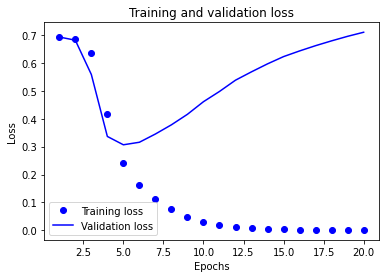

In [35]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

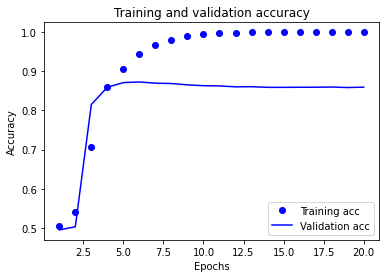

In [36]:
plt.clf()   # 그림을 초기화

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## (3) Word2Vec의 적용

### 워드 임베딩(word embedding) 기법 : 단어의 특성을 저차원 벡터값으로 표현
- model의 첫 번째 레이어는 바로 Embedding 레이어
- 사전의 단어 개수 X 워드 벡터 사이즈만큼의 크기를 가진 학습 파라미터

#### 감성 분류 모델이 학습이 잘 되었다면, Embedding 레이어에 학습된 워드 벡터들도 의미 공간상에 유의미한 형태로 학습되었을 것

<진행순서>
- 워드 벡터 파일을 저장할 디렉터리를 먼저 생성  
- 워드 벡터를 다루는데 유용한 gensim 패키지 버전 확인
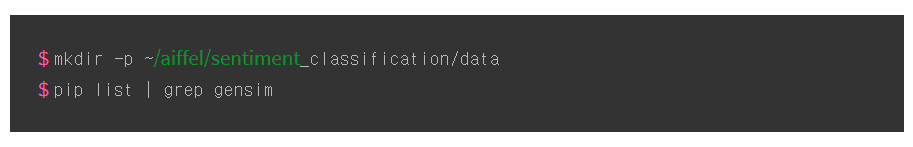

### 임베딩 레이어 확인
1. 임베딩 레이어 변수 지정  
2. 학습한 임베딩 파라미터를 파일에 써서 저장
3. 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록
4. gensim에서 제공하는 패키지를 이용해 임베딩 파라미터를 읽어서 word vector로 활용
<br>
#### 워드벡터 성능확인 하는 법
- gensim을 사용해 단어를 하나 주고 그와 가장 유사한 단어와 그 유사도를 확인

In [37]:
# 임베딩 레이어 변수 지정
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 16)


In [38]:
# 학습한 Embedding 파라미터를 파일에 써서 저장
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [39]:
# gensim에서 제공하는 패키지를 이용해 임베딩 파라미터를 읽어서 word vector로 활용
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['computer']
vector

array([ 0.00290402,  0.02075765, -0.02794435, -0.01438107, -0.00366139,
       -0.01368109, -0.00956847, -0.07369464, -0.07033338, -0.03272894,
        0.03038316, -0.02222547,  0.01494087,  0.0248105 ,  0.00432237,
        0.06641069], dtype=float32)

In [40]:
# gensim을 사용해 단어를 하나 주고 그와 가장 유사한 단어와 그 유사도를 확인
word_vectors.similar_by_word("love")

[('inserted', 0.8406186103820801),
 ('reasons', 0.8357470035552979),
 ('darius', 0.8347812294960022),
 ('enjoyable', 0.8343791365623474),
 ('brink', 0.8269224762916565),
 ('apartment', 0.8211082220077515),
 ('disagree', 0.8144947290420532),
 ('involving', 0.8102853298187256),
 ('ealing', 0.8090906739234924),
 ('perfect', 0.807573139667511)]

### Word2Vec
- 구글에서 제공하는 사전학습된(Pretrained) 워드 임베딩 모델
- 1억 개의 단어로 구성된 Google News dataset을 바탕으로 학습
- 총 300만 개의 단어를 각각 300차원의 벡터로 표현한 것
- 사전학습된 임베딩을 활용하는 것이 유리한 이유는 전이학습 때문이다  

<br><br>
###  Google의 Word2Vec 모델 적용
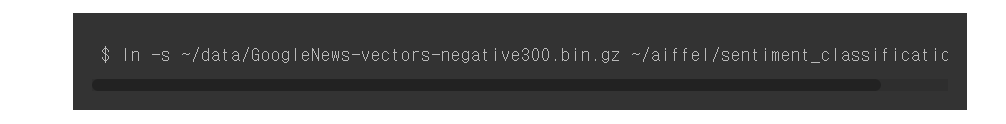
<br>
- 가장 많이 사용되는 **상위 100만 개만 limt으로 조건**을 주어 로딩

In [41]:
from gensim.models import KeyedVectors

word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=1000000)
vector = word2vec['computer']
vector     # 무려 300dim의 워드 벡터

array([ 1.07421875e-01, -2.01171875e-01,  1.23046875e-01,  2.11914062e-01,
       -9.13085938e-02,  2.16796875e-01, -1.31835938e-01,  8.30078125e-02,
        2.02148438e-01,  4.78515625e-02,  3.66210938e-02, -2.45361328e-02,
        2.39257812e-02, -1.60156250e-01, -2.61230469e-02,  9.71679688e-02,
       -6.34765625e-02,  1.84570312e-01,  1.70898438e-01, -1.63085938e-01,
       -1.09375000e-01,  1.49414062e-01, -4.65393066e-04,  9.61914062e-02,
        1.68945312e-01,  2.60925293e-03,  8.93554688e-02,  6.49414062e-02,
        3.56445312e-02, -6.93359375e-02, -1.46484375e-01, -1.21093750e-01,
       -2.27539062e-01,  2.45361328e-02, -1.24511719e-01, -3.18359375e-01,
       -2.20703125e-01,  1.30859375e-01,  3.66210938e-02, -3.63769531e-02,
       -1.13281250e-01,  1.95312500e-01,  9.76562500e-02,  1.26953125e-01,
        6.59179688e-02,  6.93359375e-02,  1.02539062e-02,  1.75781250e-01,
       -1.68945312e-01,  1.21307373e-03, -2.98828125e-01, -1.15234375e-01,
        5.66406250e-02, -

In [42]:
# 메모리를 다소 많이 소비하는 작업이니 유의해 주세요.
word2vec.similar_by_word("love")

[('loved', 0.6907791495323181),
 ('adore', 0.6816873550415039),
 ('loves', 0.661863386631012),
 ('passion', 0.6100708842277527),
 ('hate', 0.600395679473877),
 ('loving', 0.5886635780334473),
 ('affection', 0.5664337873458862),
 ('undying_love', 0.5547304749488831),
 ('absolutely_adore', 0.5536840558052063),
 ('adores', 0.5440906882286072)]

###  이전 스텝에서 학습했던 모델의 임베딩 레이어를 Word2Vec의 것으로 교체하여 다시 학습

In [43]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원수
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

In [44]:
from tensorflow.keras.initializers import Constant

vocab_size = 10000    # 어휘 사전의 크기(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원 수 

# 모델 구성
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   # trainable을 True로 주면 Fine-tuning
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 580, 300)          3000000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 574, 16)           33616     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 114, 16)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 108, 16)           1808      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [45]:
# 학습의 진행
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 4s 86ms/step - loss: 0.6901 - accuracy: 0.5309 - val_loss: 0.6815 - val_accuracy: 0.5591
Epoch 2/20
30/30 [==============================] - 2s 72ms/step - loss: 0.6640 - accuracy: 0.6065 - val_loss: 0.6623 - val_accuracy: 0.5928
Epoch 3/20
30/30 [==============================] - 2s 73ms/step - loss: 0.6065 - accuracy: 0.6983 - val_loss: 0.5730 - val_accuracy: 0.7198
Epoch 4/20
30/30 [==============================] - 2s 73ms/step - loss: 0.4521 - accuracy: 0.8142 - val_loss: 0.3877 - val_accuracy: 0.8363
Epoch 5/20
30/30 [==============================] - 2s 73ms/step - loss: 0.2970 - accuracy: 0.8835 - val_loss: 0.3175 - val_accuracy: 0.8636
Epoch 6/20
30/30 [==============================] - 2s 74ms/step - loss: 0.2247 - accuracy: 0.9152 - val_loss: 0.2963 - val_accuracy: 0.8768
Epoch 7/20
30/30 [==============================] - 2s 74ms/step - loss: 0.1652 - accuracy: 0.9447 - val_loss: 0.3025 - val_accuracy: 0.8745
Epoch 8/20
30

In [48]:
# 테스트셋을 통한 모델 평가
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

782/782 - 2s - loss: 0.5477 - accuracy: 0.8608
[0.5477474331855774, 0.860759973526001]


### 그래프 그리기

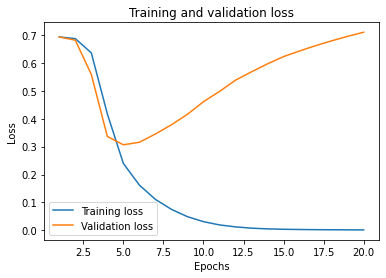

In [46]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

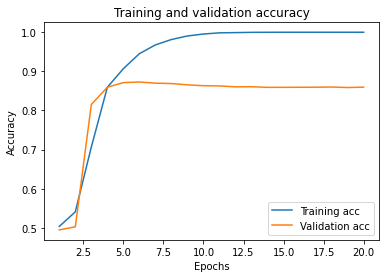

In [47]:
# 정확도
plt.clf()   # 그림을 초기화

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 네이버 영화 리뷰

###  [Naver sentiment movie corpus](https://github.com/e9t/nsmc) 사용

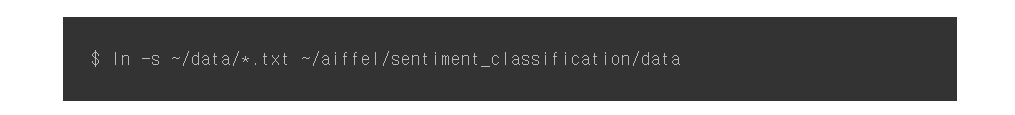

### 1) 데이터 준비와 확인

#### gensim을 실행하기 위해 처음부터 확인

In [1]:
# gensim 패키지 버전 알아보기

import gensim
gensim.__version__

'3.8.3'

In [ ]:
#!pip install --upgrade gensim==3.8.3 

In [2]:
import pandas as pd
import numpy as np
import os

import re
from konlpy.tag import Mecab

from tqdm import tqdm

%matplotlib inline
import matplotlib.pyplot as plt

import urllib.request # URL을 열기 위한 확장 가능한 라이브러리

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from collections import Counter

In [3]:
# 데이터를 읽어오기
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')


In [4]:
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 리뷰 개수 출력
train_data.head()

훈련용 리뷰 개수 : 150000


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [5]:
print('테스트용 리뷰 개수 :',len(test_data)) # 테스트용 리뷰 개수 출력
test_data.head()

테스트용 리뷰 개수 : 50000


,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


## 2) 데이터로더 구성

#### 전혀 가공되지 않은 텍스트 파일을 imdb.data_loader()와 동일하게 동작하는 자신만의 data_loader를 만들어 보는 것으로 시작

### data_loader 안에서는 수행할 것들
- 데이터의 중복 제거
- NaN 결측치 제거
- 한국어 토크나이저로 토큰화
- 불용어(Stopwords) 제거
- 사전word_to_index 구성
- 텍스트 스트링을 사전 인덱스 스트링으로 변환
- X_train, y_train, X_test, y_test, word_to_index 리턴

### data_loader() - 훈련,테스트, 정답, 단어사전 반환 - Mecab 형태소 분석기 사용

In [6]:
mecab = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def load_data(train_data, test_data, num_words=10000): 
    
    # 훈련 데이터 전철리
    train_data.drop_duplicates(subset=['document'], inplace=True)  # 중복 데이터 제거   
    train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True) # 정규 표현식으로 한글, 공백 외 문자 제거
    train_data['document'] = train_data['document'].str.replace('^ +', "", regex=True)    # white space 데이터를 empty value로 변경
    train_data['document'].replace('', np.nan, inplace=True)    # empty value를 Null 값으로 변경
    train_data = train_data.dropna(how = 'any')      # Null 샘플 제거

   
    # 테스트 데이터 전처리 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True)
    test_data['document'] = test_data['document'].str.replace('^ +', "", regex=True) 
    test_data['document'].replace('', np.nan, inplace=True)
    test_data = test_data.dropna(how = 'any')   
    
            
    # 토큰화, 불용어 제거한 단어 리스트
    X_train = []
    for sentence in tqdm(train_data['document']):
        temp_X = mecab.morphs(sentence) # 형태소 분석
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in tqdm(test_data['document']):
        temp_X = mecab.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
    


    # 단어사전 만들기
    words = np.concatenate(X_train).tolist()     # 한 줄짜리 리스트 만들기
    counter = Counter(words)                     # {단어: 출현 수} 딕셔너리 반환
    counter = counter.most_common(10000-4)       # 출현수가 많은 것에서 9996개 리스트 반환
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter] # 원소가 단어인 10000개의 리스트 
    word_to_index = {word:index for index, word in enumerate(vocab)}  # {단어:인덱스} 단어사전
      
        
    # 입력 문자가 단어사전에 있으면 단어사전 인덱스로 변환, 없으면 '<UNK>'의 인덱스를 반환하는 함수        
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]
      
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index
    
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)

print(f"훈련 데이터의 개수 : {len(X_train)}, 테스트 데이터의 개수 : {len(X_test)}")

100%|██████████| 48852/48852 [00:04<00:00, 11491.87it/s]


훈련 데이터의 개수 : 145393, 테스트 데이터의 개수 : 48852


## 3) 모델 구성을 위한 데이터 분석 및 가공
- 데이터셋 내 문장 길이 분포
- 적절한 최대 문장 길이 지정
- keras.preprocessing.sequence.pad_sequences 을 활용한 패딩 추가

In [7]:
# 빈 리스트 제거
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
drop_test = [index for index, sentence in enumerate(X_test) if len(sentence) < 1]

X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
X_test = np.delete(X_test, drop_test, axis=0)
y_test = np.delete(y_test, drop_test, axis=0)

print(f"훈련데이터 개수 : {len(X_train)}, 정답 개수 : {len(y_train)}")
print(f"테스트 데이터 개수 : {len(X_test)}, 정답 개수 : {len(y_test)}")

훈련데이터 개수 : 145380, 정답 개수 : 145380
테스트 데이터 개수 : 48846, 정답 개수 : 48846


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


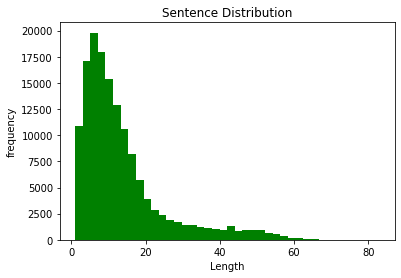

In [8]:
# 문장의 분포 구하기
train_len = []
for i in X_train:
    train_len.append(len(i))
    
plt.hist(x=train_len, bins=40, color="green")
plt.xlabel('Length')
plt.ylabel('frequency')
plt.title('Sentence Distribution')
plt.show()

In [9]:
# 표준편차를 이용해 문장의 최대 길이 구하기

max_len = int(np.mean(train_len) + np.std(train_len)*2)
print(f"문장의 최대길이 : {max(train_len)}")
print(f"문장의 평균길이 : {np.mean(train_len)}")
print(f"입력문장의 최대길이 : {max_len}")

문장의 최대길이 : 83
문장의 평균길이 : 13.801368826523593
입력문장의 최대길이 : 36


### 문장 패딩 추가

In [10]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        padding='post', # 혹은 'pre'
                                                        maxlen=max_len)

X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                       padding='post', # 혹은 'pre'
                                                       maxlen=max_len)

print(X_train.shape)
print(y_train.shape)

(145380, 36)
(145380,)


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_val,  Y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=2022, stratify=y_train)

print(f"훈련데이터 개수 : {len(x_train)}, 정답 개수 : {len(Y_train)}")
print(f"검증 데이터 개수 : {len(x_val)}, 정답 개수 : {len(y_val)}")

훈련데이터 개수 : 116304, 정답 개수 : 116304
검증 데이터 개수 : 29076, 정답 개수 : 29076


## 4) 모델 구성 및 validation set 구성 - 그래프도 같이...
- 모델은 3가지 이상 다양하게 구성하여 실험해 보세요

### 한글 Word2Vec embedding 사용하기 위해 vector_dim 미리 조정

### 1. GlobalMaxPooling1D

In [12]:
# GlobalMaxPooling1D 모델
vocab_size = 10000    
word_vector_dim = 200  

# model 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(256, 3, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(2))
model.add(tf.keras.layers.Conv1D(128, 3, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         2000000   
_________________________________________________________________
conv1d (Conv1D)              (None, None, 256)         153856    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 256)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         98432     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               12900     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

### 학습

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-conv1d.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)             
epochs=10 

hist = model.fit(x_train, Y_train, epochs=epochs, validation_data=(x_val, y_val), 
                 verbose=1, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
3635/3635 [==============================] - 22s 5ms/step - loss: 0.3923 - accuracy: 0.8224 - val_loss: 0.3371 - val_accuracy: 0.8549
Epoch 2/10
3635/3635 [==============================] - 19s 5ms/step - loss: 0.3020 - accuracy: 0.8728 - val_loss: 0.3312 - val_accuracy: 0.8576
Epoch 3/10
3635/3635 [==============================] - 19s 5ms/step - loss: 0.2407 - accuracy: 0.9023 - val_loss: 0.3565 - val_accuracy: 0.8556
Epoch 4/10
3635/3635 [==============================] - 19s 5ms/step - loss: 0.1799 - accuracy: 0.9300 - val_loss: 0.4172 - val_accuracy: 0.8444
Epoch 5/10
3635/3635 [==============================] - 19s 5ms/step - loss: 0.1312 - accuracy: 0.9502 - val_loss: 0.5495 - val_accuracy: 0.8449


In [14]:
# 저장한 모델 불러와서 테스트 데이터 정확도 구하기

model = keras.models.load_model('best-conv1d.h5')
model.evaluate(X_test, y_test, verbose=1)

1527/1527 [==============================] - 4s 2ms/step - loss: 0.5685 - accuracy: 0.8381


[0.5685326457023621, 0.8381443619728088]

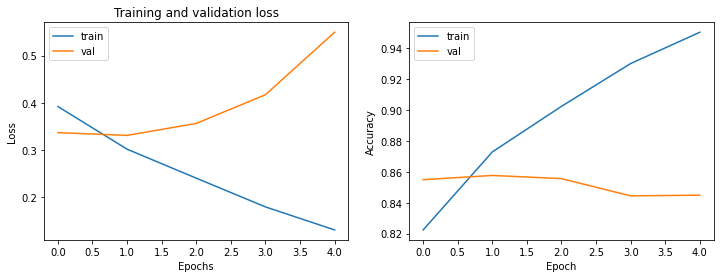

In [15]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.ylim(0, 1)
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim(0, 1)
plt.legend(['train', 'val'])

plt.show()

## 2. LSTM

### LSTM 1 - optimizer='adam'

In [16]:
vocab_size = 10000    
word_vector_dim = 200 

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model2.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 200)         2000000   
_________________________________________________________________
lstm (LSTM)                  (None, None, 8)           6688      
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 2,007,241
Trainable params: 2,007,241
Non-trainable params: 0
_________________________________________________________________


In [17]:
# optimizer='adam'
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-LSTMadam-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)  

epochs=10 

hist2 = model2.fit(x_train, Y_train, epochs=epochs, validation_data=(x_val, y_val), 
                 verbose=1, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
3635/3635 [==============================] - 30s 7ms/step - loss: 0.4173 - accuracy: 0.8107 - val_loss: 0.3444 - val_accuracy: 0.8499
Epoch 2/10
3635/3635 [==============================] - 26s 7ms/step - loss: 0.3178 - accuracy: 0.8637 - val_loss: 0.3409 - val_accuracy: 0.8512
Epoch 3/10
3635/3635 [==============================] - 26s 7ms/step - loss: 0.2851 - accuracy: 0.8789 - val_loss: 0.3432 - val_accuracy: 0.8504
Epoch 4/10
3635/3635 [==============================] - 26s 7ms/step - loss: 0.2567 - accuracy: 0.8933 - val_loss: 0.3487 - val_accuracy: 0.8529
Epoch 5/10
3635/3635 [==============================] - 26s 7ms/step - loss: 0.2321 - accuracy: 0.9051 - val_loss: 0.3618 - val_accuracy: 0.8535


In [18]:
# 저장한 모델 불러와서 테스트 데이터 정확도 구하기
best_LSTMadam = keras.models.load_model('best-LSTMadam-model.h5')
best_LSTMadam.evaluate(X_test, y_test)

1527/1527 [==============================] - 5s 3ms/step - loss: 0.3719 - accuracy: 0.8486


[0.3719217777252197, 0.8485853672027588]

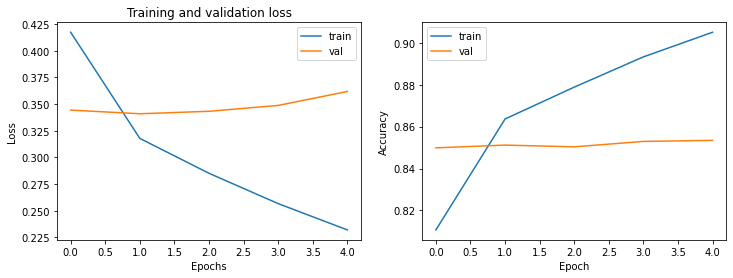

In [19]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])

plt.show()

### LSTM 2 - optimizer='rmsprop'

In [20]:
vocab_size = 10000    
word_vector_dim = 200 

model2_1 = keras.Sequential()
model2_1.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model2_1.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model2_1.add(keras.layers.LSTM(8, dropout=0.3))
model2_1.add(keras.layers.Dense(1, activation='sigmoid'))

model2_1.summary()

rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model2_1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-LSTMrms-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)  

epochs=20 

hist2_1 = model2_1.fit(x_train, Y_train, epochs=epochs, validation_data=(x_val, y_val), 
                 verbose=1, callbacks=[checkpoint_cb, early_stopping_cb])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 200)         2000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 8)           6688      
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 2,007,241
Trainable params: 2,007,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
3635/3635 [==============================] - 30s 8ms/step - loss: 0.4152 - accuracy: 0.8119 - val_loss: 0.3746 - val_accuracy: 0.8207
Epoch 2/20
3635/3635 [==============================] - 27s 7ms/step - loss: 0.3547 - accuracy: 0

In [21]:
# 저장한 모델 불러와서 테스트 데이터 정확도 구하기
best_LSTMrms = keras.models.load_model('best-LSTMrms-model.h5')
best_LSTMrms.evaluate(X_test, y_test)

1527/1527 [==============================] - 5s 3ms/step - loss: 0.3336 - accuracy: 0.8579


[0.33363696932792664, 0.8578593730926514]

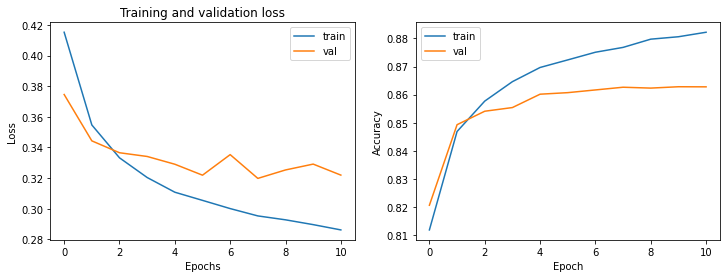

In [22]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist2_1.history['loss'])
plt.plot(hist2_1.history['val_loss'])
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist2_1.history['accuracy'])
plt.plot(hist2_1.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])

plt.show()

### GRU1 - optimizer='adam'

In [23]:
vocab_size = 10000    
word_vector_dim = 200 

model3 = keras.Sequential()
model3.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model3.add(keras.layers.GRU(8))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 200)         2000000   
_________________________________________________________________
gru (GRU)                    (None, 8)                 5040      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 2,005,049
Trainable params: 2,005,049
Non-trainable params: 0
_________________________________________________________________


In [24]:
# optimizer='adam'
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-GRUadam-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)  

epochs=20 

hist3 = model3.fit(x_train, Y_train, epochs=epochs, validation_data=(x_val, y_val), 
                 verbose=1, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
3635/3635 [==============================] - 20s 5ms/step - loss: 0.4276 - accuracy: 0.7783 - val_loss: 0.3350 - val_accuracy: 0.8567
Epoch 2/20
3635/3635 [==============================] - 19s 5ms/step - loss: 0.2903 - accuracy: 0.8759 - val_loss: 0.3199 - val_accuracy: 0.8630
Epoch 3/20
3635/3635 [==============================] - 19s 5ms/step - loss: 0.2439 - accuracy: 0.9000 - val_loss: 0.3405 - val_accuracy: 0.8595
Epoch 4/20
3635/3635 [==============================] - 19s 5ms/step - loss: 0.2070 - accuracy: 0.9168 - val_loss: 0.3619 - val_accuracy: 0.8543
Epoch 5/20
3635/3635 [==============================] - 19s 5ms/step - loss: 0.1780 - accuracy: 0.9305 - val_loss: 0.3912 - val_accuracy: 0.8515


In [25]:
# 저장한 모델 불러와서 테스트 데이터 정확도 구하기
best_GRUadam = keras.models.load_model('best-GRUadam-model.h5')
best_GRUadam.evaluate(X_test, y_test)

1527/1527 [==============================] - 4s 2ms/step - loss: 0.4011 - accuracy: 0.8478


[0.40109893679618835, 0.8477664589881897]

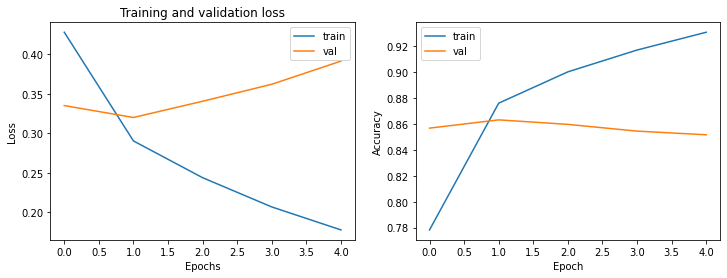

In [26]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])

plt.show()

### GRU2 - optimizer='rmsprop'

In [27]:
vocab_size = 10000    
word_vector_dim = 200 

model3_2 = keras.Sequential()
model3_2.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model3_2.add(keras.layers.GRU(8))
model3_2.add(keras.layers.Dense(1, activation='sigmoid'))

model3_2.summary()

rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model3_2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-GRUrms-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)  

epochs=20 

hist3_2 = model3_2.fit(x_train, Y_train, epochs=epochs, validation_data=(x_val, y_val), 
                 verbose=1, callbacks=[checkpoint_cb, early_stopping_cb])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 200)         2000000   
_________________________________________________________________
gru_1 (GRU)                  (None, 8)                 5040      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 2,005,049
Trainable params: 2,005,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
3635/3635 [==============================] - 20s 5ms/step - loss: 0.4821 - accuracy: 0.7314 - val_loss: 0.3497 - val_accuracy: 0.8477
Epoch 2/20
3635/3635 [==============================] - 19s 5ms/step - loss: 0.3332 - accuracy: 0.8563 - val_loss: 0.3411 - val_accuracy: 0.8517
Epoch 3/20
3635/3635 [==============================] - 19s 5ms/step - loss: 0.3100 

In [28]:
# 저장한 모델 불러와서 테스트 데이터 정확도 구하기
best_GRUrms = keras.models.load_model('best-GRUrms-model.h5')
best_GRUrms.evaluate(X_test, y_test)

1527/1527 [==============================] - 4s 2ms/step - loss: 0.3367 - accuracy: 0.8577


[0.3366643190383911, 0.8577365875244141]

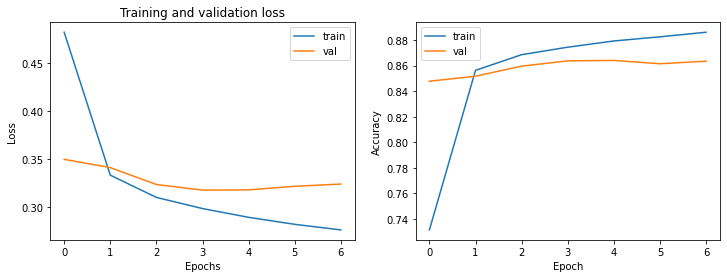

In [29]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist3_2.history['loss'])
plt.plot(hist3_2.history['val_loss'])
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist3_2.history['accuracy'])
plt.plot(hist3_2.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])

plt.show()

## 5) 학습된 Embedding 레이어 분석
#### [Pre-trained word vectors of 30+ languages](https://github.com/Kyubyong/wordvectors)
-  적절한 ko.bin을 찾아 이용하세요. 그리고 gensim 버전을 3.x.x로 낮춰야 오류가 나지 않습니다.

In [30]:
# 임베딩 레이어 변수 지정
embedding_layer = best_GRUrms.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

# 디코딩
index_to_word = {index:word for word, index in word_to_index.items()}

(10000, 200)


In [31]:
# 학습한 Embedding 파라미터를 파일에 써서 저장
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [32]:
# gensim에서 제공하는 패키지를 이용해 임베딩 파라미터를 읽어서 word vector로 활용
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['행복']
vector

array([-2.35740438e-01,  1.48737803e-01, -9.27318037e-02, -2.32008278e-01,
        4.45909053e-03,  2.43874550e-01,  1.96729541e-01, -1.70519762e-02,
        1.45612419e-01,  8.70136917e-02,  1.11806720e-01, -2.29649380e-01,
       -4.94363718e-02,  1.21967919e-01, -1.39749736e-01,  1.98521260e-02,
       -9.10435542e-02, -1.46681204e-01, -2.26511657e-01,  2.83494622e-01,
       -3.02525520e-01, -1.69870168e-01,  7.91094601e-02,  1.84894830e-01,
       -2.02034228e-02, -2.27281958e-01,  1.07641742e-01,  2.03968510e-01,
        1.20273391e-02,  8.62810388e-02, -1.81439310e-01, -9.07108560e-03,
        3.39210927e-01, -2.24016577e-01,  2.20647812e-01,  1.32766679e-01,
        9.18652564e-02, -1.49509832e-01,  1.95911080e-01,  2.38697410e-01,
       -1.37934178e-01, -4.61962372e-01,  1.90985817e-02, -6.74282685e-02,
       -2.23859757e-01, -6.15164824e-02,  1.45202607e-01, -2.36179367e-01,
       -1.87038511e-01, -1.32323846e-01,  1.43515989e-01,  2.57597119e-01,
        1.10431455e-01, -

In [33]:
# gensim을 사용해 단어를 하나 주고 그와 가장 유사한 단어와 그 유사도를 확인
word_vectors.similar_by_word("행복")

[('아름다운', 0.7304970026016235),
 ('반해', 0.7175805568695068),
 ('최수종', 0.7105233073234558),
 ('풍성', 0.7058603763580322),
 ('탄탄', 0.694217324256897),
 ('심장', 0.6927374601364136),
 ('파란', 0.6922857165336609),
 ('마음속', 0.6917539238929749),
 ('거침없이', 0.6903315782546997),
 ('우연찮', 0.687454342842102)]

## 6) 한국어 버전 Word2Vec Embedding

In [34]:
from gensim.models import KeyedVectors

word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/ko.bin'
word2vec_ko = gensim.models.Word2Vec.load(word2vec_path)
vector_any = word2vec_ko['사랑']
vector_any.shape

/tmp/ipykernel_1190/4208297916.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vector_any = word2vec_ko['사랑']


(200,)

In [35]:
word2vec_ko.wv.most_similar("선거")

[('총선거', 0.7462450265884399),
 ('총선', 0.7030401825904846),
 ('대선', 0.6811904907226562),
 ('투표', 0.6405338048934937),
 ('경선', 0.6404521465301514),
 ('개표', 0.6106421947479248),
 ('재선거', 0.6045101881027222),
 ('표결', 0.5645790100097656),
 ('의회', 0.5523425936698914),
 ('야권', 0.5519712567329407)]

In [36]:
vocab_size = 10000     # 단어 사전의 크기(10,000개의 단어)
word_vector_dim = 200  # 워드 벡터의 차원 수

embedding_matrix = np.random.rand(vocab_size, word_vector_dim) # 사전학습된 임베딩 레이어의 차원 수 그대로 따라가는 것이 좋아요!

#embedding_matrix에 Word2Vec 워드벡터를 단어 하나씩 순서대로 카피
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec_ko:
        embedding_matrix[i] = word2vec_ko[index_to_word[i]]

/tmp/ipykernel_1190/2387564163.py:8: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if index_to_word[i] in word2vec_ko:
/tmp/ipykernel_1190/2387564163.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embedding_matrix[i] = word2vec_ko[index_to_word[i]]


### LSTM 2 - optimizer='rmsprop' 한글 Word2Vec 적용해보기

In [39]:
from tensorflow.keras.initializers import Constant


vocab_size = 10000    
word_vector_dim = 200 

model_lstmrms = keras.Sequential()
model_lstmrms.add(keras.layers.Embedding(vocab_size, word_vector_dim, 
                                    embeddings_initializer=Constant(embedding_matrix),   # 카피한 임베딩 활용
                                    input_shape=(None,)))
model_lstmrms.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model_lstmrms.add(keras.layers.LSTM(8, dropout=0.3))
model_lstmrms.add(keras.layers.Dense(1, activation='sigmoid'))

model_lstmrms.summary()

rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model_lstmrms.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-LSTMrmsw2b-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)  

epochs=20 

hist_lstmrms = model_lstmrms.fit(x_train, Y_train, epochs=epochs, validation_data=(x_val, y_val), 
                 verbose=1, callbacks=[checkpoint_cb, early_stopping_cb])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 200)         2000000   
_________________________________________________________________
lstm_6 (LSTM)                (None, None, 8)           6688      
_________________________________________________________________
lstm_7 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 2,007,241
Trainable params: 2,007,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
3635/3635 [==============================] - 30s 8ms/step - loss: 0.5039 - accuracy: 0.7464 - val_loss: 0.3923 - val_accuracy: 0.8247
Epoch 2/20
3635/3635 [==============================] - 27s 7ms/step - loss: 0.3930 - accuracy: 0

In [40]:
# 저장한 모델 불러와서 테스트 데이터 정확도 구하기
best_LSTMrms = keras.models.load_model('best-LSTMrmsw2b-model.h5')
best_LSTMrms.evaluate(X_test, y_test)

1527/1527 [==============================] - 5s 3ms/step - loss: 0.3474 - accuracy: 0.8517


[0.3473508954048157, 0.8516561985015869]

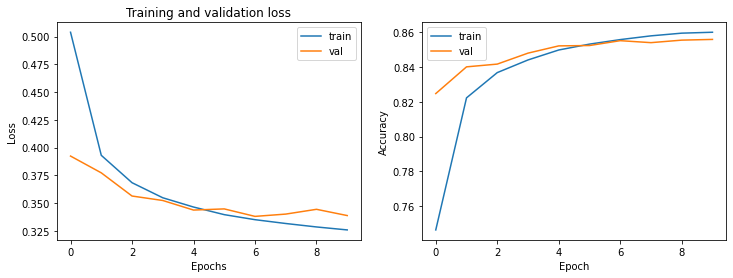

In [41]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_lstmrms.history['loss'])
plt.plot(hist_lstmrms.history['val_loss'])
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist_lstmrms.history['accuracy'])
plt.plot(hist_lstmrms.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])

plt.show()

1. train_test_split에 stratify를 적용하니 조금 더 정확도가 올라갔다.
2. '혼공머'에 LSTM의 옵티마이저를 'RMSprop'를 써서 사용해 보니 'Adam'보다 조금 더 정확도가 좋아짐..
3. Word2Vec를 썼으나 내가 훈련한 정확도 보다는 잘 나오지 않음...
<br>

#### 🎉 나의 숨은 조력자들!!
#### 🎊🎊박성돈님, 정구연님. 박준서님 여러 선배님들의 익스결과물~ 여러분 감사합니다~~ !!🎊🎊


### 참고링크 [6) 네이버 영화 리뷰 감성 분류하기(Naver Movie Review Sentiment Analysis)](https://wikidocs.net/44249)


# 🧼회고

## 이번 프로젝트에서 어려웠던 점
#### 1. 한글 정제, 구조, 형태소.. 등 언어 데이터 전처리를 하는 것
#### 2. 파이썬을 잘 못하니 문장 해석하는 데 시간이 걸려서...

## 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**
### 1.  알아낸 점
#### 1) 한글 형태분석기도 여러 가지가 있다.
#### 2) Word2Vec가 있다는 것
#### 3) train_test_split의 매개변수 stratify에 대해 정확히 인지
#### 4) LSTM에 옵티마이저는 'RMSprop'가 'Adam'보다는 좋은 것 같음

### 2. 모호한 것
#### 1) Word2Vec가 어떻게 적용되는 지는 아직 애매함...  -> 있는 것이 어떻게 적용되는 걸까?? ㅎㅎ
#### 2) 파이썬은 늘 모호하다.. 😁😁😁

## 루브릭 평가 지표를 맞추기 위해 **시도한 것들**
#### 1) 💥데이터 전처리💥 하는 것에 신경을 많이 씀.. 빈 리스트 제거 등..
#### 2) Okt, Mecab로 2개를 똑같이 실험.. - >Mecab가 조금 더 정확도가 좋게 나왔음..
#### 3) Mecab로 제출, Okt는 링크로...
#### 4) RNN계열의 모델을 쓸 때, 'Adam',  'RMSprop' 두 가지로 다 실험해봄..

## 자기다짐
#### 완성하는 데 시간이 걸리는 만큼 남기를 희망하며... 시간 배분을 잘하자...

<br><br>
### ⏳ [Okt로 실습](https://github.com/flowerJung/flowerJung.github.io/blob/main/%5BE-06%5DOkt%20naver%20movie%20review.ipynb)